<a href="https://colab.research.google.com/github/ianara01/Park-Sangjin/blob/master/random_forest1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['price'] = housing.target

# 데이터 기본 정보 확인
print("데이터 크기:", df.shape)
print("\\n데이터 정보:")
print(df.info())
print("\\n기술 통계량:")
print(df.describe())

# 특성 설명
print("\\n특성 설명:")
for name, desc in zip(housing.feature_names, housing.DESCR.split('\\n')[10:19]):
    print(f"{name}: {desc}")


데이터 크기: (20640, 9)
\n데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
\n기술 통계량:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.

In [3]:
type(housing)

sklearn.utils._bunch.Bunch

In [5]:
housing['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [7]:
# price 값을 target으로 하여 append
df['price'] = housing.target

In [8]:
# 특성 설명
print("\\n특성 설명:")
for name, desc in zip(housing.feature_names, housing.DESCR.split('\\n')[10:19]):
    print(f"{name}: {desc}")


\n특성 설명:


데이터 전처리, eda

\n결측치 확인:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64


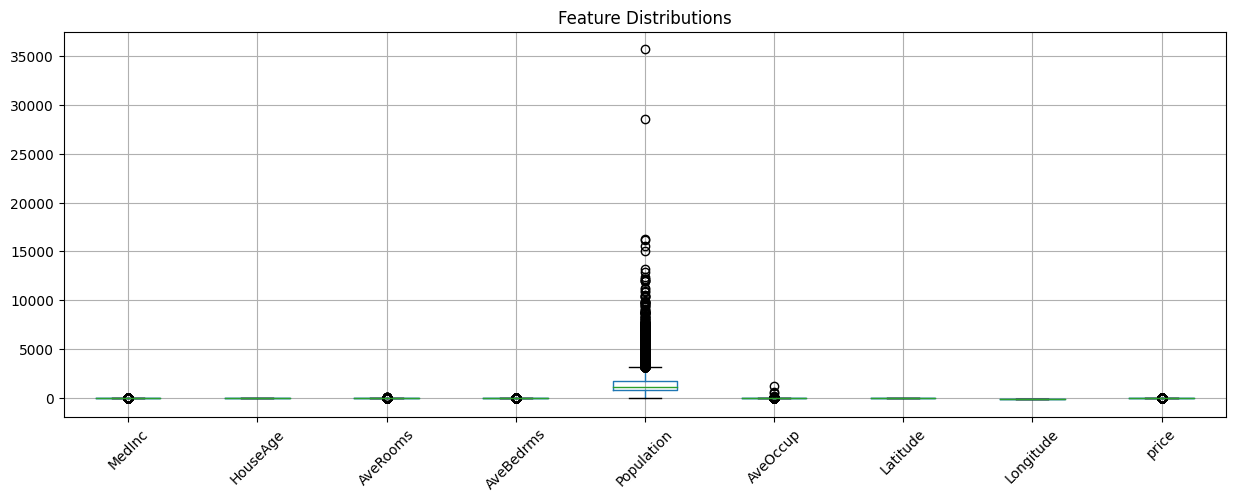

In [9]:
# 결측치 확인
print("\\n결측치 확인:")
print(df.isnull().sum())

# 특성과 타겟 분리
X = df.drop('price', axis=1)
y = df['price']

# 이상치 확인을 위한 박스플롯
plt.figure(figsize=(15, 5))
df.boxplot()
plt.title('Feature Distributions')
plt.xticks(rotation=45)
plt.show()


In [14]:
import matplotlib.font_manager as fm

# 시스템에 설치된 모든 폰트 목록
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'Nanum' in font:
        print(font)

In [11]:

'''
# 상관관계 분석
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('특성 간 상관관계')
plt.show()

# 가격과 각 특성의 관계 산점도
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, feature in enumerate(X.columns):
    sns.scatterplot(data=df, x=feature, y='price', ax=axes[idx])
    axes[idx].set_title(f'Price vs {feature}')

plt.tight_layout()
plt.show()
'''

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 한글 폰트 경로 (환경에 따라 다를 수 있음)
font_prop = fm.FontProperties(fname=font_path)

plt.rc('font', family=font_prop.get_name())
plt.rc('axes', unicode_minus=False)  # 음수 기호가 깨지는 문제 해결

# 상관관계 분석
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('특성 간 상관관계')
plt.show()

# 가격과 각 특성의 관계 산점도
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, feature in enumerate(X.columns):
    sns.scatterplot(data=df, x=feature, y='price', ax=axes[idx])
    axes[idx].set_title(f'Price vs {feature}')

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

In [12]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

# 모델 학습
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, random_state=42)

RMSE: 0.544511508935255
R2 Score: 0.7737402686595128


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51092 (\N{HANGUL SYLLABLE JAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49437 (\N{HANGUL SYLLABLE SEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

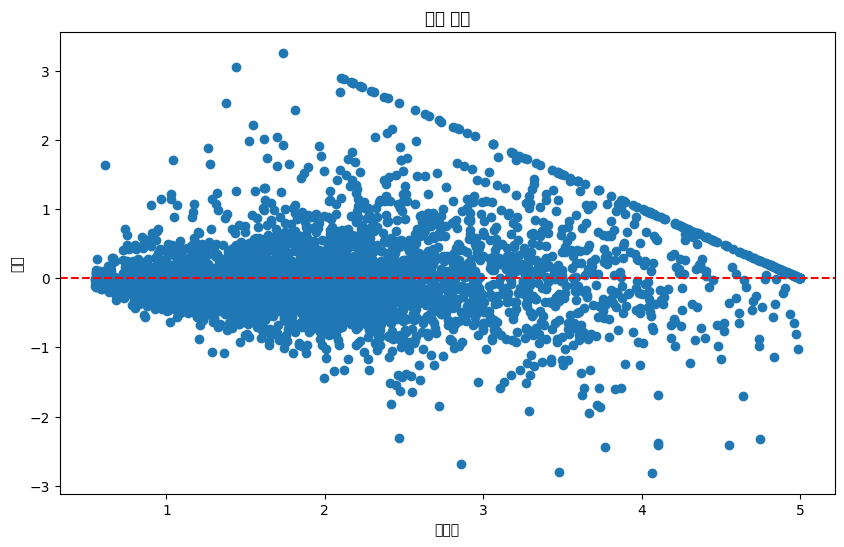

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# 예측
y_pred = rf_model.predict(X_test)

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)

# 잔차 분석
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.title('잔차 분석')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


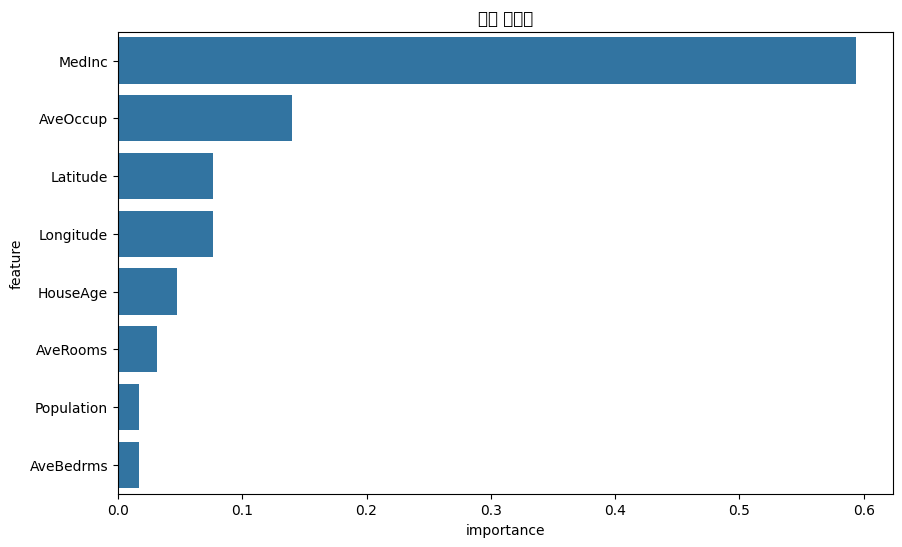

In [15]:
# 특성 중요도 시각화
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('특성 중요도')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

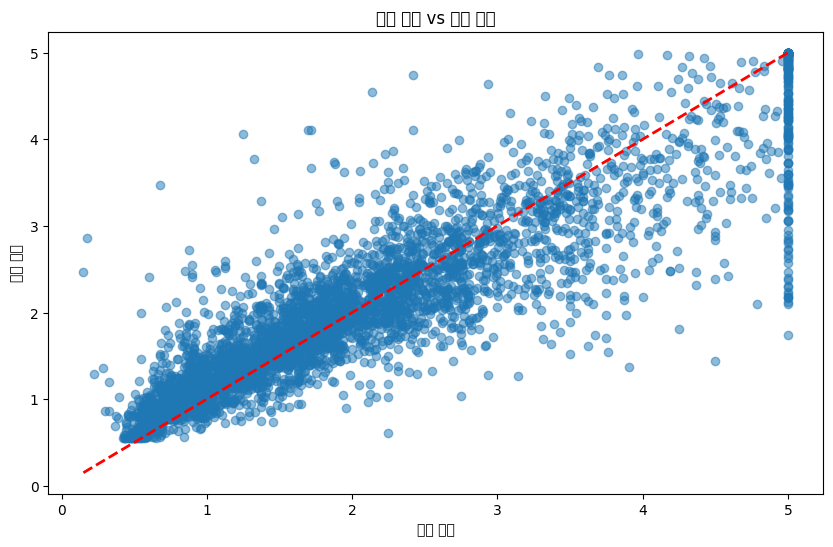

In [16]:
# 실제값과 예측값 비교
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('실제 가격')
plt.ylabel('예측 가격')
plt.title('실제 가격 vs 예측 가격')
plt.show()


In [17]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# 그리드 서치
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train, y_train)

# 최적 파라미터 출력
print("최적 파라미터:", grid_search.best_params_)


최적 파라미터: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}


In [19]:
# 예시 데이터 생성
new_data = pd.DataFrame({
    'MedInc': [8.0],
    'HouseAge': [30.0],
    'AveRooms': [5.0],
    'AveBedrms': [2.0],
    'Population': [2000.0],
    'AveOccup': [2.5],
    'Latitude': [35.0],
    'Longitude': [-119.0]
})

# 예측
prediction = rf_model.predict(new_data)
print("예측 주택 가격:", prediction[0])


예측 주택 가격: 4.604207008519671


In [20]:
# 개발자에게 모델 전달
import pickle
with open("rf_house.pickel", 'wb') as f:
  pickle.dump(rf_model, f)
